# Telco Classification Project

<h2>Goal:</h2>

* To find out the biggest driver of churn in Telco

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import my own acquire module
import env
import acquire
import wrangle as wr

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting the models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Acquire the Data

* Data acquired from Codeup SQL database.
* I imported the data using SQL commands into my python program.
* I acquired my data on the first day of my project.
* The raw data has 23 columns and 7,043 rows.
* Each row or observation is specific to a Telco customer.
* Each column represents a feature containing data specific to each of Telco's customers.

In [2]:
from wrangle import get_telco_data
telco = get_telco_data()
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Prepare the Data

Steps executed:
* Dropped duplicate columns
* Dropped null values stored as whitespace 
* Converted to correct datatype (float)
* Converted binary categorical variables to numeric (encoded)
* Got dummies for non-binary categorical variables
* Concatenated dummy dataframe to original
* Dropped more duplicate columns
* Split the data
* - split the data into train, validate, and test
* Returned the split, clean data

In [3]:
# Importing the prepare function and using it to clean the data.
from wrangle import prep_telco_data
train, validate, test = prep_telco_data(telco)
train.head(3)

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0


In [4]:
train, validate, test = wr.scale_the_data(train, validate, test)

In [5]:
train.columns

Index(['senior_citizen', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded', 'gender_Male',
       'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'paperless_billing_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'month

## Explore the Data

<h3>Initial Questions


<h3><b>Question 1: Is tenure associated with monthly charges as a driver of churn?

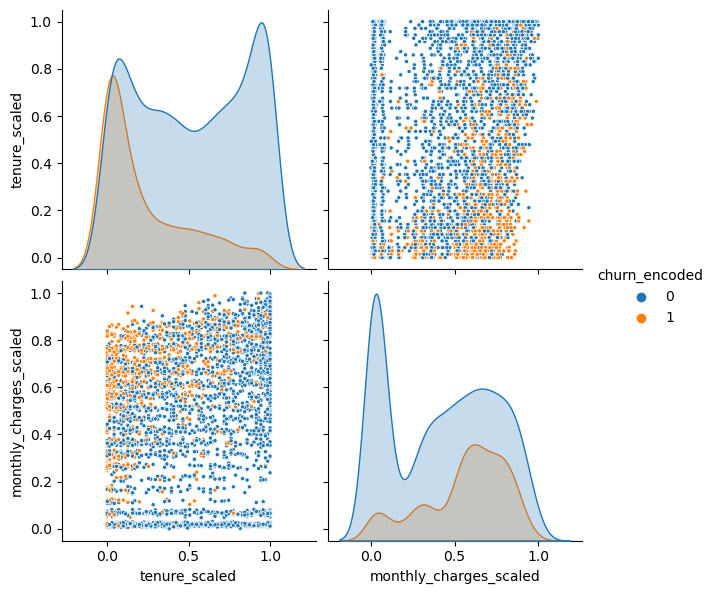

In [6]:
#Get pairplot chart
col = train[['tenure_scaled', 'monthly_charges_scaled']]
            
sns.pairplot(data = train, vars=col, hue = 'churn_encoded', markers='.', size=(3))
plt.show()

The location and saturation of 'Yes' churns in the above graph show correlation of churn in customers with low 'tenure' and higher 'monthly charges'.

Next I used a chi-square test to compare the categorical features of 'tenure' and 'monthly charges'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between tenure and churn.\
$H_A$ There is a significant association between tenure and churn.

In [7]:
#Get chi-test results
from wrangle import get_chi_tenure
get_chi_tenure(train)

chi^2 = 1582.9468
p     = 0.0000
We reject H₀:There is no association between tenure and churn


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between Tenure and Churn.****

<h3><b>Question 2: Does contract type significantly affect churn?**

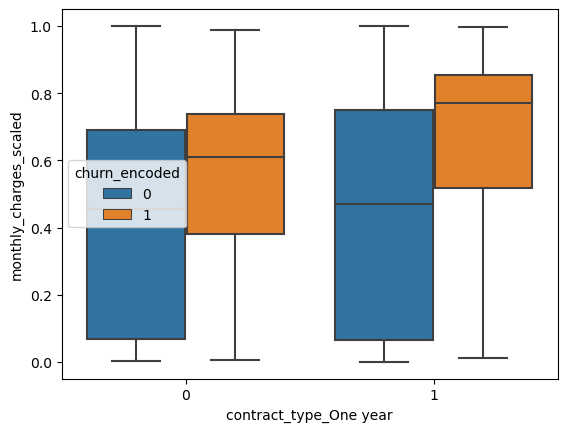

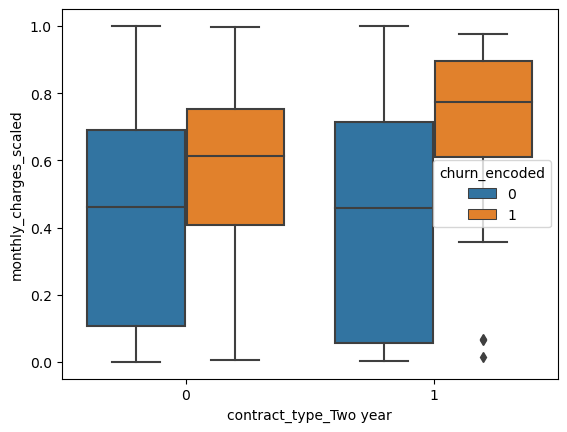

In [8]:
sns.boxplot(data = train, y = train.monthly_charges_scaled, x = 'contract_type_One year', hue = 'churn_encoded')
plt.show()
sns.boxplot(data = train, y = train.monthly_charges_scaled, x = 'contract_type_Two year', hue = 'churn_encoded')
plt.show()

The above boxplot appears to show that there may be a difference in 'churn' than 'no churn' and that  there could be something to look at here.
Next I used a chi-square test to compare the categorical features of 'contract_type_One year' and 'contract_type_One year'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between churn in one year and two year contracts.\
$H_A$ There is a significant association between churn in one year and two year contracts.

In [9]:
#Get chi-test results
from wrangle import get_chi_contracts
get_chi_contracts(train)

chi^2 = 328.3907
p     = 0.0000
We reject H₀:There is no association between one year and two year contracts and churn


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between churn in one year and two year contracts.****

<h3><b>Question 3: Does the feature 'partner' significantly affects churn?**

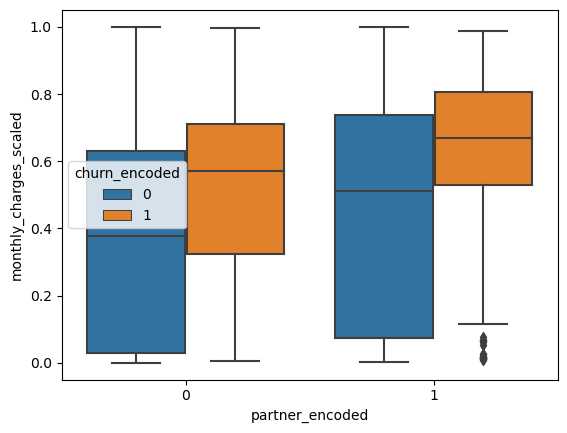

In [10]:
sns.boxplot(data = train, y = train.monthly_charges_scaled, x = train.partner_encoded, hue = 'churn_encoded')
plt.show()

The above boxplot appears to show that 'partner' could be a driver and that  there could be something to look at here.
Next I used a chi-square test to compare the features of 'partner' and 'churn'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between churn and partner.\
$H_A$ There is a significant association between churn and partner.

In [11]:
#Get chi-test results
from wrangle import get_chi_partner
get_chi_partner(train)

chi^2 = 80.0893
p     = 0.0000
We reject H₀:There is no association between churn and partner


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between churn and partner.****

<h3><b>Question 4: Does the feature 'dependents' significantly affects churn?**

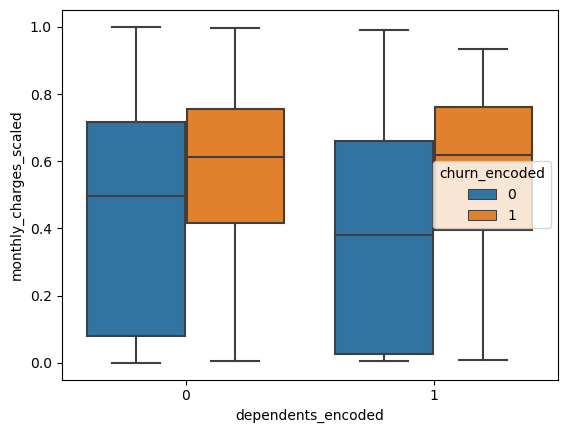

In [12]:
sns.boxplot(data = train, y = train.monthly_charges_scaled, x = train.dependents_encoded, hue = 'churn_encoded')
plt.show()

The above boxplot appears to show that 'dependents' could be a driver and that  there could be something to look at here.
Next I used a chi-square test to compare the features of 'dependents' and 'churn'.

- I will use a confidence interval of 95%.
- The resulting alpha is .05.

$H_0$ There is no association between churn and dependents.\
$H_A$ There is a significant association between churn and dependents.

In [13]:
#Get chi-test results
from wrangle import get_chi_dependents
get_chi_dependents(train)

chi^2 = 104.5425
p     = 0.0000
We reject H₀:There is no association between churn and dependents


<div class="alert alert-info" role="alert">
****Based on the results from the chi-square test, there is a significant relationship between churn and dependents.****

## Exploration Summary

* After looking at all features univariately, bi & multi-variate, I formulated initial questions about the data regarding the target 'churn'.
* For each of the four questions above, I used visualizations and statistical testing to determine if there were relationships between the corresponding features and the target that could prove useful in in my modeling. 
* Utilizing the chi-test, I confirmed that all four features have a significant relationship with churn.

* Additionally, I fed all of the features through a correlation heatmap ranking the top 10 features that correlated to the target. I used these 10 features in each of my classification models as either 'Top 5' or 'Top 10' to see how they affect the model's prediction accuracy.

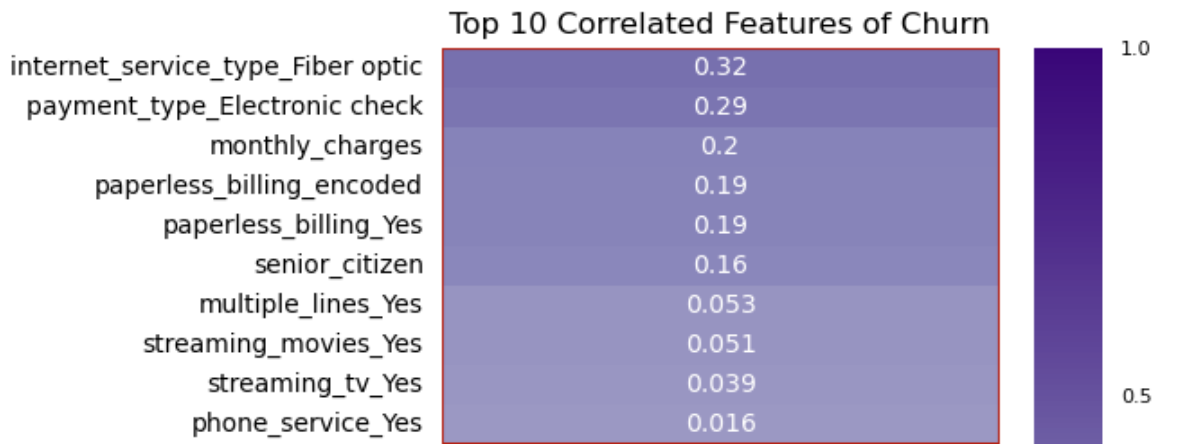

* Lastly, I decided to get the top 5 features from BOTH SelectK Best and Recursive Feature Engineering(RFE) have more input options for my modeling process.



# Modeling

### Introduction

* I evaluated my train and validate data using three models: Decision Tree, KNN, and Random Forest to see
which model I should move forward with.

* For each model, I fed in my Correlation Heatmap Top 5 and Top 10, SelectK Best, and the RFE features to get the best insight as to which features would drive the best prediction model.

* I calculated my baseline by using the mean of the largest portion of my target "churn_encoded" which happened to be "no" or "0". 

In [14]:
baseline_accuracy = (train.churn_encoded == 0).mean()
baseline_accuracy

0.7343154686309372

## Decision Tree Model

* SelectKBest was the best performing set of input features for this model

In [15]:
wr.get_SelectKBest_decision_tree(train, validate, test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2891
           1       0.66      0.58      0.62      1046

    accuracy                           0.81      3937
   macro avg       0.76      0.74      0.74      3937
weighted avg       0.80      0.81      0.80      3937

Accuracy of Decision Tree on train data is 0.8084836169672339
Accuracy of Decision Tree on validate data is 0.773696682464455


## KNN Model

* SelectKBest was also the best performing set of input features for this model

In [16]:
wr.get_SelectKBest_KNN(train, validate, test)

Accuracy of KNN classifier on training set: 0.80
Accuracy of KNN classifier on validate set: 0.75


## Random Forest Model

* SelectKBest was . . . suprise . . . the best performing set of input features for this model

In [17]:
wr.get_SelectKBest_RandomForest(train, validate, test)

Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.78


### After running my training and validate data through the three models, it appears that Random Forest had the best prediction accuracy overall, along with the smallest difference between the training and validate sets. I proceeded with this model and input feature set for my test run.

# Test Model - Random Forest

In [18]:
wr.get_SelectKBest_RandomForest_Test(train, validate, test)

Accuracy of random forest classifier on Training set: 0.81
Accuracy of random forest classifier on Validate set: 0.78
Accuracy of random forest classifier on Test set: 0.79


### Modeling Wrap 
* Random Forest's test data proved to hold true with an accuracy of 79%, ultimately beating the baseline by 6%. 

# Conclusion

### Summary
* Overall, my initial look at the data provided led me to ask questions regarding which individual features (columns) were potentially affecting the target (churn). I found, through possible correlations found in certain features identified through a correlation heatmap and by selecting the top 5 features using both SelectKBest and RFE, that there could be different sets of  features that had some impact on churn, so I fed them into my three classification models: Decision Tree, K Nearest Neighbors (KNN), and Random Forest. 

* A suprising note was that the SelectK Best set of features (listed below) performed the best in all of the models.

- Tenure
- Contract_type_Two year
- Internet_service_type_Fiber optic
- Internet_service_type_None
- Payment_type_Electronic check


* The Random Forest Model performed the best in the train and validate modeling, so I conducted the Test model on Random Forest using the SelectK Best set of features, which ultimately ended up beating the baseline by 6%. 

### Recommendations
* I would definitely recommend further evaluation and consideration into the one and two-year contracts currently provided to customers and find a way to retain those who have low tenure. A possible solution could be giving satiable incentives that reduce a customers monthly bill the longer a customer stays.

### Next Steps
* As a Data Scientist, if given more time to work on this project, I would dig further into ALL of my individual features, conducting more than just the chi-tests and I'd also include other models in my testing to see what comes out of it.